In [2]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import pandas.util.testing as tm

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Read the data
data=pd.read_csv("/content/drive/MyDrive/DDOS.csv")

In [5]:
#Making a copy of data
data=data.copy()

#Feature Engineering

1. Understanding Data

In [6]:
#checking the missing values
data.isnull().sum()

pkSeqID              0
proto                0
saddr                0
sport                0
daddr                0
dport                0
seq                  0
stddev               0
N_IN_Conn_P_SrcIP    0
min                  0
state_number         0
mean                 0
N_IN_Conn_P_DstIP    0
drate                0
srate                0
max                  0
attack               0
category             0
subcategory          0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551069 entries, 0 to 551068
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pkSeqID            551069 non-null  int64  
 1   proto              551069 non-null  object 
 2   saddr              551069 non-null  object 
 3   sport              551069 non-null  int64  
 4   daddr              551069 non-null  object 
 5   dport              551069 non-null  int64  
 6   seq                551069 non-null  int64  
 7   stddev             551069 non-null  float64
 8   N_IN_Conn_P_SrcIP  551069 non-null  int64  
 9   min                551069 non-null  float64
 10  state_number       551069 non-null  int64  
 11  mean               551069 non-null  float64
 12  N_IN_Conn_P_DstIP  551069 non-null  int64  
 13  drate              551069 non-null  float64
 14  srate              551069 non-null  float64
 15  max                551069 non-null  float64
 16  at

In [8]:
data.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,3142762,udp,192.168.100.150,6551,192.168.100.3,80,251984,1.900363,100,0.000000,4,2.687519,100,0.0,0.494549,4.031619,1,DDoS,3
1,2432264,tcp,192.168.100.150,5532,192.168.100.3,80,256724,0.078003,38,3.856930,3,3.934927,100,0.0,0.256493,4.012924,1,DDoS,2
2,1976315,tcp,192.168.100.147,27165,192.168.100.3,80,62921,0.268666,100,2.974100,3,3.341429,100,0.0,0.294880,3.609205,1,DDoS,2
3,3257991,udp,192.168.100.147,22461,192.168.100.3,80,105063,0.822418,100,2.979995,4,3.983222,100,0.0,1.002999,4.994452,1,DDoS,3
4,3406860,udp,192.168.100.150,31712,192.168.100.3,80,253932,1.928021,100,0.000000,4,2.726619,100,0.0,0.490708,4.097849,1,DDoS,3


In [9]:
data['proto'].unique()

array(['udp', 'tcp', 'arp', 'ipv6-icmp'], dtype=object)

In [10]:
data['saddr'].unique()

array(['192.168.100.150', '192.168.100.147', '192.168.100.148',
       '192.168.100.149', '192.168.100.3', '192.168.100.5',
       '192.168.100.27', 'fe80::250:56ff:febe:254',
       'fe80::250:56ff:febe:e9d9', '192.168.100.46',
       'fe80::250:56ff:febe:26db', '192.168.100.1', '192.168.100.6',
       'fe80::250:56ff:febe:89ee', '192.168.100.4', '192.168.100.7'],
      dtype=object)

In [11]:
data['daddr'].unique()

array(['192.168.100.3', '192.168.100.149', '192.168.100.147',
       '192.168.100.150', '192.168.217.2', '192.168.100.55',
       '255.255.255.255', '192.168.100.148', '96.7.49.66',
       '205.251.197.206', '192.168.100.1', '205.251.194.201',
       '224.0.0.251', '205.251.196.32', '52.201.147.106', '192.5.5.241',
       '192.55.83.30', '192.31.80.30', '8.8.8.8', '13.55.154.73',
       'ff02::2', '192.41.162.30', '129.250.35.250', 'ff02::fb',
       '27.124.125.250', '199.19.56.1', '192.168.100.5', '192.33.14.30',
       '205.251.199.148', '192.58.128.30', '192.12.94.30',
       '205.251.196.160', '205.251.199.194', '192.36.148.17',
       '184.85.248.65', '192.33.4.12', '52.11.124.117', '192.168.100.255',
       '192.54.112.30', 'ff02::1', '172.217.25.170', '205.251.194.102',
       '192.112.36.4', '192.168.100.7', '205.251.194.86',
       '192.168.100.27', '192.52.178.30', '205.251.195.59', '52.35.35.13'],
      dtype=object)

In [12]:
data.describe()

,pkSeqID,sport,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,subcategory
count,5.510690e+05,551069.000000,551069.000000,551069.00000,551069.000000,551069.000000,551069.000000,551069.000000,551069.000000,551069.000000,551069.000000,551069.000000,551069.000000,551069.000000,551069.000000
mean,2.613331e+06,32843.044983,114.671671,123246.92643,0.943188,81.969236,1.305582,3.043076,2.550446,99.887061,0.011114,2.330649,3.348142,0.999786,2.490931
std,5.563163e+05,18945.086103,1087.618617,73832.66073,0.751504,24.203479,1.492350,1.191108,1.405292,2.586545,2.935290,1347.090777,1.647346,0.014632,0.502229
min,1.650262e+06,-1.000000,-1.000000,1.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.130961e+06,16417.000000,80.000000,59969.00000,0.122008,68.000000,0.000000,3.000000,2.015771,100.000000,0.000000,0.249863,3.260891,1.000000,2.000000
50%,2.613154e+06,32937.000000,80.000000,120243.00000,0.929186,97.000000,0.172103,3.000000,2.760165,100.000000,0.000000,0.409866,4.057606,1.000000,2.000000
75%,3.095561e+06,49310.000000,80.000000,183152.00000,1.688021,100.000000,2.764762,4.000000,3.660429,100.000000,0.000000,0.632226,4.172477,1.000000,3.000000
max,3.577360e+06,65535.000000,65191.000000,262161.00000,2.496763,100.000000,4.980471,8.000000,4.981882,100.000000,2178.649170,1000000.000000,4.999999,1.000000,3.000000


In [13]:
#Removing the unwanted coloumns
col=['saddr','daddr','category','attack']
data=data.drop(columns=col,axis=1)

In [14]:
#Removing the dublicate values
data.drop_duplicates(keep='first',inplace=True)

2. Exploratory Data Analysis

In [15]:
data.head()

,pkSeqID,proto,sport,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,subcategory
0,3142762,udp,6551,80,251984,1.900363,100,0.000000,4,2.687519,100,0.0,0.494549,4.031619,3
1,2432264,tcp,5532,80,256724,0.078003,38,3.856930,3,3.934927,100,0.0,0.256493,4.012924,2
2,1976315,tcp,27165,80,62921,0.268666,100,2.974100,3,3.341429,100,0.0,0.294880,3.609205,2
3,3257991,udp,22461,80,105063,0.822418,100,2.979995,4,3.983222,100,0.0,1.002999,4.994452,3
4,3406860,udp,31712,80,253932,1.928021,100,0.000000,4,2.726619,100,0.0,0.490708,4.097849,3


In [16]:
#Frequency of each category
data['proto'].value_counts()

tcp          279898
udp          271148
arp              20
ipv6-icmp         3
Name: proto, dtype: int64

In [17]:
#relationship between the independent variables
data.corr()

,pkSeqID,sport,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,subcategory
pkSeqID,1.000000,0.028381,-0.025309,0.041127,0.283287,0.096279,0.313319,0.690818,0.578290,0.010148,0.000374,0.002398,0.566030,0.861500
sport,0.028381,1.000000,-0.054821,0.146653,-0.041334,-0.071058,0.059562,0.014901,0.022857,0.029784,0.001671,0.001822,0.008701,0.004481
dport,-0.025309,-0.054821,1.000000,-0.052003,-0.019346,-0.003269,0.003938,-0.054284,-0.006778,-0.362694,0.000449,-0.000080,-0.013511,-0.031889
seq,0.041127,0.146653,-0.052003,1.000000,0.084922,0.024939,-0.131195,0.068956,-0.061803,0.066769,-0.003366,-0.002136,-0.041741,-0.009532
stddev,0.283287,-0.041334,-0.019346,0.084922,1.000000,0.038761,-0.444261,0.226809,0.237585,0.028591,-0.002296,-0.001721,0.577641,0.277520
N_IN_Conn_P_SrcIP,0.096279,-0.071058,-0.003269,0.024939,0.038761,1.000000,0.024259,0.077468,0.054138,0.060019,-0.004462,-0.003888,0.060747,0.090809
min,0.313319,0.059562,0.003938,-0.131195,-0.444261,0.024259,1.000000,0.294196,0.749652,0.016340,-0.001643,-0.000986,0.471697,0.367569
state_number,0.690818,0.014901,-0.054284,0.068956,0.226809,0.077468,0.294196,1.000000,0.512158,0.050762,-0.005163,-0.001170,0.489783,0.788662
mean,0.578290,0.022857,-0.006778,-0.061803,0.237585,0.054138,0.749652,0.512158,1.000000,0.037252,-0.003219,-0.002251,0.918118,0.638301
N_IN_Conn_P_DstIP,0.010148,0.029784,-0.362694,0.066769,0.028591,0.060019,0.016340,0.050762,0.037252,1.000000,-0.046578,-0.044754,0.041472,0.072748


In [18]:
#Cross tables and data visualization
#Extracting the coloumn names
data.columns

Index(['pkSeqID', 'proto', 'sport', 'dport', 'seq', 'stddev',
       'N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'N_IN_Conn_P_DstIP',
       'drate', 'srate', 'max', 'subcategory'],
      dtype='object')

In [19]:
#proto proportion table
pd.crosstab(index=data['proto'],columns='count',normalize=True)

col_0,count
proto,
arp,0.000036
ipv6-icmp,0.000005
tcp,0.507918
udp,0.492040


In [20]:
#proto vs attack
pd.crosstab(index=data['proto'],columns=data['subcategory'],normalize=True)

subcategory,0,1,2,3
proto,,,,
arp,0.000018,0.000000,0.000016,0.000002
ipv6-icmp,0.000005,0.000000,0.000000,0.000000
tcp,0.000024,0.000515,0.507379,0.000000
udp,0.000167,0.000000,0.000000,0.491873


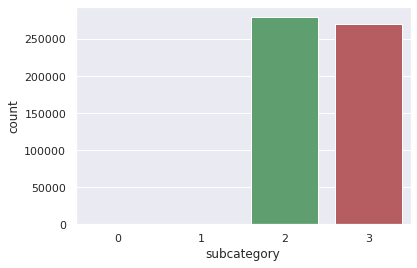

In [21]:
#frequency distribution of attack
sns.countplot(data['subcategory'])

In [22]:

data=data.drop(columns='pkSeqID')

In [23]:
#Categorical Encoding
data=pd.get_dummies(data)

In [24]:
data.head()

,sport,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,subcategory,proto_arp,proto_ipv6-icmp,proto_tcp,proto_udp
0,6551,80,251984,1.900363,100,0.000000,4,2.687519,100,0.0,0.494549,4.031619,3,0,0,0,1
1,5532,80,256724,0.078003,38,3.856930,3,3.934927,100,0.0,0.256493,4.012924,2,0,0,1,0
2,27165,80,62921,0.268666,100,2.974100,3,3.341429,100,0.0,0.294880,3.609205,2,0,0,1,0
3,22461,80,105063,0.822418,100,2.979995,4,3.983222,100,0.0,1.002999,4.994452,3,0,0,0,1
4,31712,80,253932,1.928021,100,0.000000,4,2.726619,100,0.0,0.490708,4.097849,3,0,0,0,1


In [25]:
#Seperating the features and target variable
y=data['subcategory']
x=data.drop(columns='subcategory')

In [26]:
data.shape

(551069, 17)

In [27]:
x.shape

(551069, 16)

#

In [28]:
#Balancing the target variable
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state = 0)
x, y = smk.fit_sample(x,y)

In [29]:
x.shape

(1118436, 16)

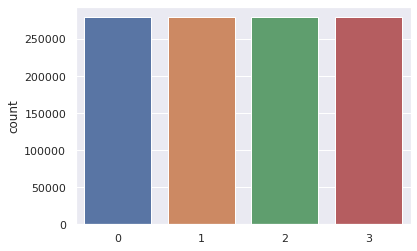

In [30]:
sns.countplot(y)

In [31]:
#Spliting dataset into Train and Test set 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [32]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
#Checking the accuracy of model
from sklearn.metrics import accuracy_score
y_pred=clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(" Testing Accuracy: %.2f%%" % (accuracy * 100.0))
scores = cross_val_score(clf, x_train, y_train, cv=10)
print("Cross Validation Accuracy: %.2f%% " % (scores.mean()*100))

 Testing Accuracy: 100.00%
Cross Validation Accuracy: 100.00% 


Text(0.5, 1.0, 'AdaBoostClassifier')

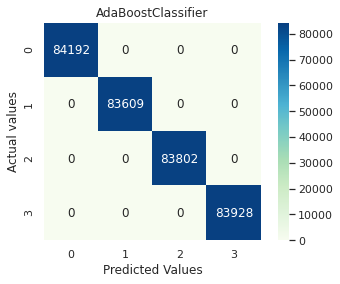

In [35]:
#confusion matrix
from sklearn.metrics import confusion_matrix
con = confusion_matrix(y_test,y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
axes = sns.heatmap(con, square=True,annot=True,fmt='d',cbar = True, cmap = plt.cm.GnBu)
ax = plt.axes()
plt.xlabel('Predicted Values')
plt.ylabel('Actual values')
ax.set_title('AdaBoostClassifier')

In [36]:
from sklearn.metrics import classification_report
print('AdaBoost Classifier')
print(classification_report(y_test, y_pred))

AdaBoost Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84192
           1       1.00      1.00      1.00     83609
           2       1.00      1.00      1.00     83802
           3       1.00      1.00      1.00     83928

    accuracy                           1.00    335531
   macro avg       1.00      1.00      1.00    335531
weighted avg       1.00      1.00      1.00    335531



In [37]:
#from sklearn.metrics import roc_auc_score
#roc_auc_score(y_test,y_pred)

In [1]:
#from sklearn.model_selection import learning_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, x, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
   
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, x, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")


fig, axes = plt.subplots(3, 1, figsize=(10, 15))

title = "Learning Curves (AdaBoost Classifier)"
# Cross validation with 10 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = RandomForestClassifier()
plot_learning_curve(estimator, title, x, y,axes=axes[:,], cv=cv, ylim=(0.7, 1.01), n_jobs=4)

plt.show()

NameError: ignored